# Question 2, Project 2:

In [60]:
import csv
import pandas as pd
import pandas_datareader as pdr
from pandas import DataFrame
from math import log, sqrt, pi, exp
from datetime import datetime, date
from scipy import stats
import numpy as np
from scipy.sparse import csc_matrix
from scipy.stats import bernoulli
from scipy.optimize import fsolve
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot')
%matplotlib inline

### Import Desired Data

We also display the data to check and ensure we have what we want. We do this for both VIX and SPY.

In [41]:
SPY = pd.read_csv("SPY4.csv")
SPY

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,452.559998,453.109985,451.549988,451.799988,450.357178,48721400
1,2021-09-02,453.320007,454.049988,451.910004,453.190002,451.742767,42501000
2,2021-09-03,451.980011,453.630005,451.549988,453.079987,451.633118,47170500
3,2021-09-07,452.709991,452.809998,450.739990,451.459991,450.018280,51671500
4,2021-09-08,450.890015,451.670013,448.859985,450.910004,449.470062,56181900
...,...,...,...,...,...,...,...
58,2021-11-23,467.220001,469.100006,464.450012,468.190002,468.190002,73206500
59,2021-11-24,466.059998,469.570007,465.190002,469.440002,469.440002,61858800
60,2021-11-26,462.339996,463.899994,457.769989,458.970001,458.970001,112669600
61,2021-11-29,464.070007,466.559998,461.730011,464.600006,464.600006,86268800


In [42]:
VIX = pd.read_csv("VIX.csv", index_col = 'Date')
VIX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-30,16.770000,16.799999,15.980000,16.190001,16.190001,0
2021-08-31,15.980000,17.070000,15.910000,16.480000,16.480000,0
2021-09-01,16.059999,16.709999,15.680000,16.110001,16.110001,0
2021-09-02,16.270000,16.980000,15.730000,16.410000,16.410000,0
2021-09-03,16.270000,17.059999,16.080000,16.410000,16.410000,0
...,...,...,...,...,...,...
2021-11-22,18.200001,19.590000,17.350000,19.170000,19.170000,0
2021-11-23,20.240000,20.910000,19.030001,19.379999,19.379999,0
2021-11-24,19.170000,20.959999,18.520000,18.580000,18.580000,0


### Isolate Desired Variable For Calculations

We pull out the column data we wish to do our calculations on. This being the Adj Close of SPY.

In [43]:
SPYc = pd.DataFrame(SPY['Adj Close'])
SPYc

,Adj Close
0,450.357178
1,451.742767
2,451.633118
3,450.018280
4,449.470062
...,...
58,468.190002
59,469.440002
60,458.970001
61,464.600006


### Calculation Of Rolling Average & Plot

We now calculate the percentage change of the Adj Close of SPY, using the log method from Project 1. Next, we follow the given equation in question 2, where we now find the square root of the rolling average (using .std() for the inner sum), multiplying by 252/29, then finally multiplying it all by 100. We then plot the result of that rolling window.

<AxesSubplot:>

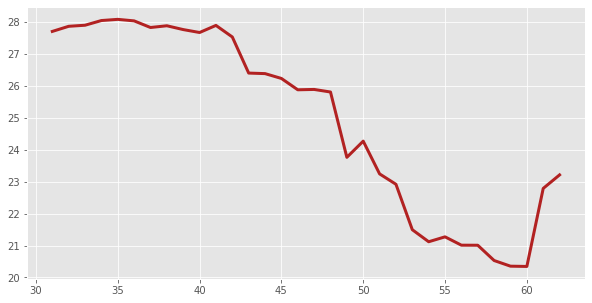

In [44]:
SPYc['Change'] = np.log(SPYc['Adj Close'] / SPYc['Adj Close'].shift())
SPYc['Volatility'] = np.sqrt(SPYc.Change.rolling(30).std().shift()*(252/29))*100
SPYc['Volatility'].plot(figsize=(10,5),linewidth=3,color='firebrick')

### Plotting VIX Data

We plot the VIX data to compare it to the rolling average. We note that the Y-axis have a similar scale, indicating we are on the right track and can continue our analysis.

<AxesSubplot:xlabel='Date'>

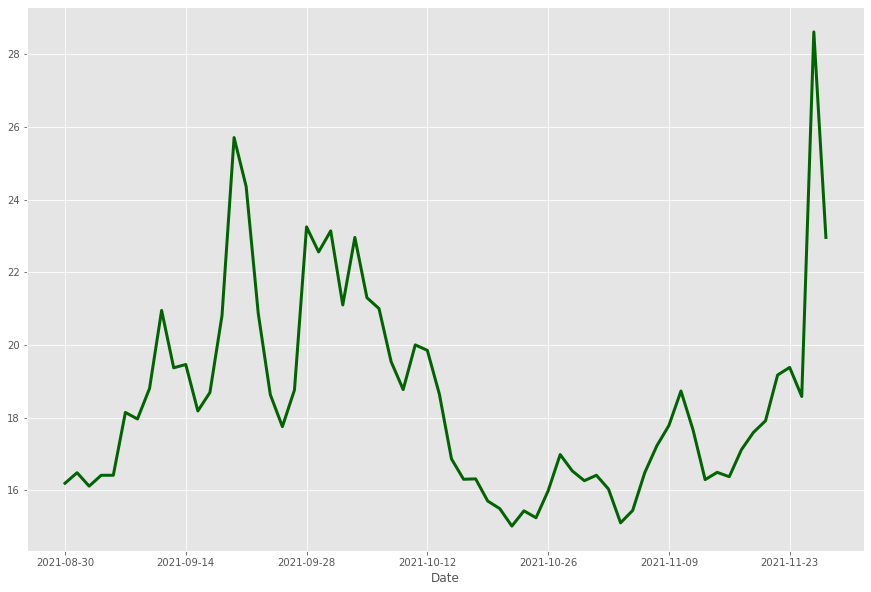

In [45]:
VIX['Adj Close'].plot(figsize=(15,10),linewidth=3,color='darkgreen')

### Plotting Both VIX and Moving Average Volatility Together

We plot VIX and the moving average together to get an easier comparison and visual as to what exactly is going on with both sets of data.

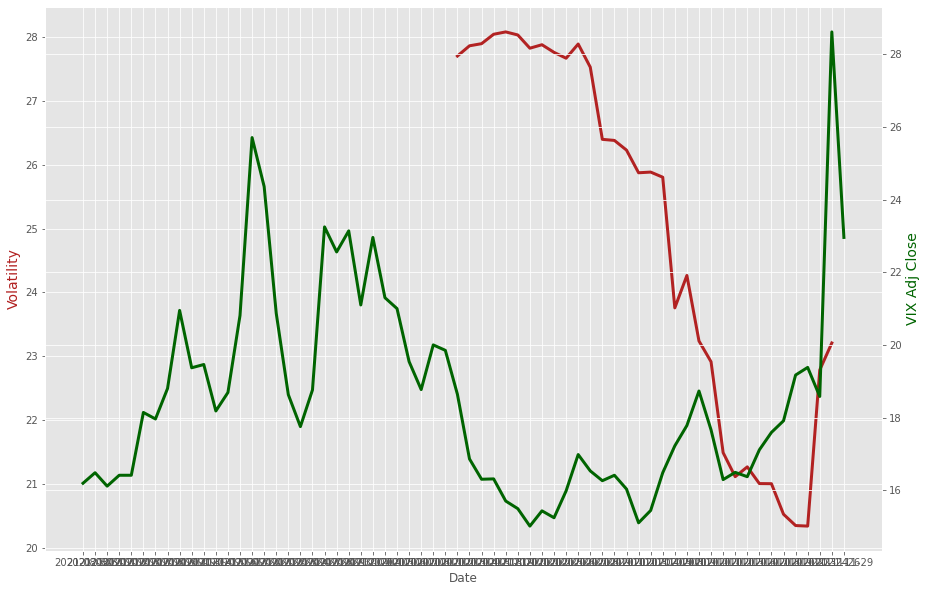

In [46]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(SPYc['Volatility'], color="firebrick",linewidth=3)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Volatility",color="firebrick",fontsize=14)
ax2=ax.twinx()
ax2.plot(VIX["Adj Close"],color="darkgreen",linewidth=3)
ax2.set_ylabel("VIX Adj Close",color="darkgreen",fontsize=14)
plt.show()

In [59]:
SPYc['Date'] = SPY['Date']
SPYc['Change'] = np.log(SPYc['Adj Close'] / SPYc['Adj Close'].shift())
SPYc['Volatility'] = np.sqrt(SPYc.Change.rolling(30).std().shift()*(252/29))*100
SPYc = SPYc[["Date", "Adj Close", "Change","Volatility"]] 
SPYc

,Date,Adj Close,Change,Volatility
0,2021-09-01,450.357178,NaN,NaN
1,2021-09-02,451.742767,0.003072,NaN
2,2021-09-03,451.633118,-0.000243,NaN
3,2021-09-07,450.018280,-0.003582,NaN
4,2021-09-08,449.470062,-0.001219,NaN
...,...,...,...,...
58,2021-11-23,468.190002,0.001325,20.530051
59,2021-11-24,469.440002,0.002666,20.353106
60,2021-11-26,458.970001,-0.022556,20.344714
61,2021-11-29,464.600006,0.012192,22.786439


In [48]:
VIXcomp = pd.DataFrame(VIX['Adj Close'])
VIXcomp

,Adj Close
Date,
2021-08-30,16.190001
2021-08-31,16.480000
2021-09-01,16.110001
2021-09-02,16.410000
2021-09-03,16.410000
...,...
2021-11-22,19.170000
2021-11-23,19.379999
2021-11-24,18.580000


### Comment on the relations and differences between these two time series ( ̄σi,vi).

The series are on a similar scale to one another, with the VIX data ranging from about 15-29 and the moving average ranging from about 20-28. The discrepancy between the two (since they are on a similar scale but don't line up a whole lot) can be explained by noting that in that timeframe, the market was in a state of upheaval due to the omicron variant of COVID-19, changing the moving average volatility while the VIX data follows what the expected volatility will be.